In [1]:
import sys
sys.path.append("../")

import tensorflow as tf
from IJCAI19.model.EmbeddedDefenseModel import *
from IJCAI19.model.ModelFactory import ModelFactory
from IJCAI19.model.BatchModel import *
from IJCAI19.module.utils import *

tf.flags.DEFINE_string(
    'weight_path', 'IJCAI19/weight/', 'Path to checkpoint for inception network.')
tf.flags.DEFINE_string(
    'input_dir', '', 'Input directory with images.')
tf.flags.DEFINE_string(
    'output_file', '', 'Output file to save labels.')
tf.flags.DEFINE_integer(
    'image_width', 299, 'Width of each input images.')
tf.flags.DEFINE_integer(
    'image_height', 299, 'Height of each input images.')
tf.flags.DEFINE_integer(
    'batch_size', 8, 'How many images process at one time.')
tf.flags.DEFINE_integer(
    'num_classes', 110, 'How many classes of the data set')
FLAGS = tf.flags.FLAGS
tf.app.flags.DEFINE_string('f', '', 'kernel')

dev_dir = "../../official_data/dev_data/"
FLAGS.input_dir = "../../test_data/NonTargetAttackResult/"
FLAGS.output_file = "../../test_data/DefenseResult.txt"
FLAGS.weight_path = "../IJCAI19/weight/"

ModelFactory.WEIGHT_DIR = FLAGS.weight_path

Using TensorFlow backend.


In [5]:
#Baseline
batch_shape = [FLAGS.batch_size, FLAGS.image_height, FLAGS.image_width, 3]
img_loader = ImageLoader(FLAGS.input_dir, batch_shape, targetlabel=False, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
name = 'inception_v1'
T = AttackModel(batch_shape, FLAGS.num_classes, name=name)
Yp, topK, acc = PredictBatch(T, img_loader)

INFO:tensorflow:Restoring parameters from ../IJCAI19/weight/inception_v1/inception_v1.ckpt
Predict  runs: 4.60 s
batchs 14 Accuracy 0.00909090909090909


In [4]:
#Defense
batch_shape = [FLAGS.batch_size, FLAGS.image_height, FLAGS.image_width, 3]
img_loader = ImageLoader(FLAGS.input_dir, batch_shape, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')

name = "inception_v1"
D = MSBModel(msb=8, batch_shape=batch_shape, output_size=FLAGS.num_classes, name=name, use_prob=True)
ypred,_,_ = PredictBatch(D, img_loader)

MSBModel () {'batch_shape': [8, 299, 299, 3], 'output_size': 110, 'name': 'inception_v1', 'use_prob': True}
INFO:tensorflow:Restoring parameters from ../IJCAI19/weight/inception_v1/inception_v1.ckpt
Predict  runs: 4.78 s
batchs 14 Accuracy 0.00909090909090909


No handles with labels found to put in legend.


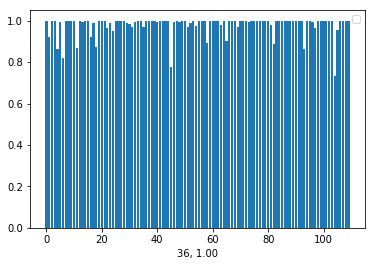

In [3]:
plot_pred(ypred.max(1), 110)

In [28]:
ypred.max(1)

array([0.9953602 , 0.81367457, 0.9999833 , 0.9998839 , 0.8640982 ,
       0.9712813 , 0.89918494, 0.9994199 , 0.9853403 , 0.96769595,
       0.99477947, 0.85279876, 0.9999665 , 0.98893857, 0.9999995 ,
       0.99878246, 0.8956638 , 0.9661808 , 0.7568534 , 0.99784577,
       0.9999256 , 0.9988972 , 0.94266635, 0.9916609 , 0.84535986,
       0.99660754, 0.992812  , 0.99999595, 0.9958313 , 0.95545757,
       0.9577867 , 0.882848  , 0.98183477, 0.99979204, 0.99631387,
       0.9205062 , 0.9999987 , 0.99998343, 0.9998853 , 0.99595696,
       0.9688166 , 0.9976726 , 0.9963381 , 0.99999976, 0.99957865,
       0.33579248, 0.9934889 , 0.99998903, 0.9939779 , 0.99981004,
       0.9999192 , 0.97460335, 0.9820403 , 0.9958294 , 0.95023626,
       0.9933119 , 0.99921167, 1.        , 0.8325514 , 0.9997272 ,
       0.99985874, 0.99801034, 0.99991   , 0.97138983, 0.99962914,
       0.93617016, 0.9999989 , 0.9992353 , 0.9990402 , 0.97774005,
       0.9998684 , 0.9992699 , 0.99572253, 0.9795131 , 0.99997

In [6]:
img_loader = ImageLoader(FLAGS.input_dir, batch_shape, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
_, X, _ = next(img_loader)

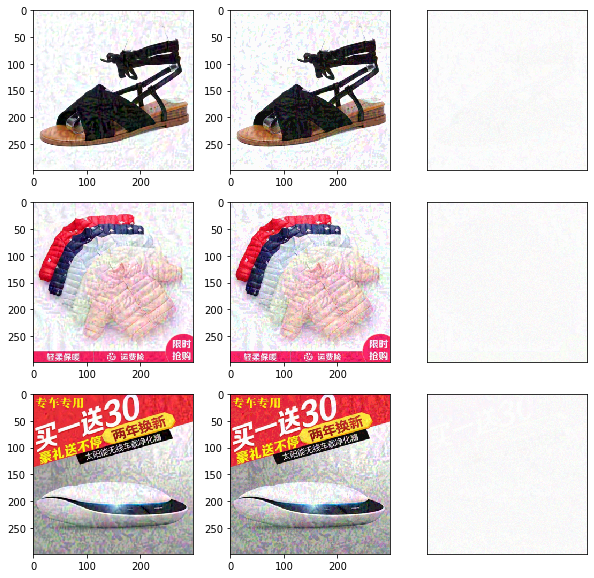

In [17]:

plot_images(X, msb_apply(X,24), n=3)

In [8]:
def msb_apply(x, msb):
    return (x//msb)*msb + (msb/2)